## Setup
------------
* Dependencies:

In [75]:
import requests
import pandas as pd
import io
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import JSON

- requesting dataset from Florida Department of Health

In [4]:
csv = requests.get("https://opendata.arcgis.com/datasets/37abda537d17458bae6677b8ab75fcb9_0.csv").content
main_df = pd.read_csv(io.StringIO(csv.decode('utf-8')))

1. Filtering out "Hospitalizations"

In [9]:
filt = main_df["Hospitalized"] == "YES"
df = main_df[filt]

2. `EventDate` formatting / manipulation 
    - Typecasting 'EventDate' to datetime
    - Creating a formatted 'EventDate' column that's easier to read
    - Truncating hours, minutes and seconds

In [10]:
df.loc[:,'EventDate'] = pd.to_datetime(df.loc[:,'EventDate'],format='%Y/%m/%d %H:%M:%S')
df.loc[:,"FormattedEventDate"] = df.loc[:,"EventDate"].dt.strftime("%m/%d/%Y")
df.loc[:,"EventDate"] = pd.to_datetime(df.loc[:,"FormattedEventDate"],format='%m/%d/%Y')

C:\Users\kpess\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\kpess\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


3. Grabbing the columns that are needed for analysis

In [11]:
df = df.iloc[:,[0,1,2,3,7,8,9,13,16]]

In [12]:
df.head(3)

,County,Age,Age_group,Gender,EDvisit,Hospitalized,Died,EventDate,FormattedEventDate
40,Palm Beach,45.0,45-54 years,Male,YES,YES,NaN,2020-06-26,06/26/2020
50,Dade,67.0,65-74 years,Female,YES,YES,NaN,2020-06-29,06/29/2020
57,Volusia,95.0,85+ years,Female,YES,YES,NaN,2020-06-28,06/28/2020


## Part 1: Data Manipulation
---------------
* Total number of hospitalizations

In [103]:
pd.DataFrame({
    "Total Hospitalizations (Florida)" : [df.shape[0]]
}).style.format("{:,}")

,Total Hospitalizations (Florida)
0,"20,154"


* All Counties

In [97]:
county_df = df.groupby(by="County").count().reset_index().loc[:,["County","Hospitalized"]]
county_df

,County,Hospitalized
0,Alachua,115
1,Baker,22
2,Bay,59
3,Bradford,19
4,Brevard,250
...,...,...
63,Unknown,2
64,Volusia,353
65,Wakulla,12
66,Walton,42


* Top 10 counties

In [48]:
top10_county = county_df.sort_values(by="Hospitalized",ascending=False).head(10)
top10_county["Rank"] = np.arange(1,11)
top10_county.set_index("Rank").style.format({"Hospitalized":"{:,}"})

,County,Hospitalized
Rank,,
1,Dade,"4,602"
2,Broward,"2,707"
3,Palm Beach,"2,191"
4,Pinellas,"1,059"
5,Hillsborough,901
6,Lee,780
7,Orange,644
8,Polk,624
9,Collier,509


- Gender

In [68]:
gender_df = pd.DataFrame({
    "Hospitalized": df.groupby("Gender").count().loc[:,"County"]
})
gender_df.style.format("{:,}")

,Hospitalized
Gender,
Female,"9,657"
Male,"10,483"
Unknown,14


In [69]:
gender_df.index

Index(['Female', 'Male', 'Unknown'], dtype='object', name='Gender')

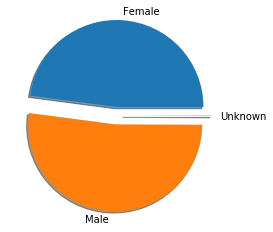

In [95]:
plt.pie(x=gender_df['Hospitalized'],explode=[0.1,0.1,0.1],shadow=True,labels=gender_df.index)
plt.show()